# preços semestrais automotivos

### Etapas

 - passo 1: Importar as biblotecas
 - passo 2: Ajustar as Informações da tabela
 - passo 3: Checar os dados 
 - passo 4: Fazer os gráfico e um pequeno resumo das informações dastacadas
 - passo 5: Qual é a região que tem preço mais alto (groupby)
 - passo 6: O valor de cobrado por cada Bandeira 
 - passo 7: Raking do Municipio que tem os maiores valores cobrados

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dados = pd.read_csv('precos-semestrais-automotivos_2021-01.csv', sep=';')
dados.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,S,RS,SAO LEOPOLDO,POSTOS DE COMBUSTIVEIS REDESINOS LTDA,01.731.418/0001-31,AVENIDA FEITORIA,4288,NaN,FEITORIA,93048-000,GASOLINA,01/01/2021,"4,599",NaN,R$ / litro,BRANCA
1,S,RS,SAO LEOPOLDO,POSTOS DE COMBUSTIVEIS REDESINOS LTDA,01.731.418/0001-31,AVENIDA FEITORIA,4288,NaN,FEITORIA,93048-000,ETANOL,01/01/2021,"4,199",NaN,R$ / litro,BRANCA
2,S,RS,SAO LEOPOLDO,POSTOS DE COMBUSTIVEIS REDESINOS LTDA,01.731.418/0001-31,AVENIDA FEITORIA,4288,NaN,FEITORIA,93048-000,GASOLINA ADITIVADA,01/01/2021,"4,799",NaN,R$ / litro,BRANCA
3,S,RS,SAO LEOPOLDO,POSTOS DE COMBUSTIVEIS REDESINOS LTDA,01.731.418/0001-31,AVENIDA FEITORIA,4288,NaN,FEITORIA,93048-000,DIESEL,01/01/2021,"3,499",NaN,R$ / litro,BRANCA
4,S,RS,SAO LEOPOLDO,POSTOS DE COMBUSTIVEIS REDESINOS LTDA,01.731.418/0001-31,AVENIDA FEITORIA,4288,NaN,FEITORIA,93048-000,DIESEL S10,01/01/2021,"3,599",NaN,R$ / litro,BRANCA


In [3]:
# Produto: Nome do combustível pesquisado;
# Data da Coleta: Data da Coleta(s) dos Preço(s); 
# Valor de Venda: Preço de venda ao consumidor final praticado pelo revendedor, na data da coleta.

In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334681 entries, 0 to 334680
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Regiao - Sigla     334681 non-null  object 
 1   Estado - Sigla     334681 non-null  object 
 2   Municipio          334681 non-null  object 
 3   Revenda            334681 non-null  object 
 4   CNPJ da Revenda    334681 non-null  object 
 5   Nome da Rua        334681 non-null  object 
 6   Numero Rua         334558 non-null  object 
 7   Complemento        68732 non-null   object 
 8   Bairro             334071 non-null  object 
 9   Cep                334681 non-null  object 
 10  Produto            334681 non-null  object 
 11  Data da Coleta     334681 non-null  object 
 12  Valor de Venda     334681 non-null  object 
 13  Valor de Compra    0 non-null       float64
 14  Unidade de Medida  334681 non-null  object 
 15  Bandeira           334681 non-null  object 
dtypes:

In [5]:
dados = dados.drop(['Complemento', 'Valor de Compra', 'CNPJ da Revenda'], axis=1)

In [6]:
dados['Regiao - Sigla'].value_counts()

SE    166870
NE     64801
S      53930
CO     28861
N      20219
Name: Regiao - Sigla, dtype: int64

In [7]:
dados['Produto'].value_counts()

GASOLINA              85260
ETANOL                76843
DIESEL S10            67427
GASOLINA ADITIVADA    63190
DIESEL                34717
GNV                    7244
Name: Produto, dtype: int64

In [8]:
dados['Municipio'].unique()

array(['SAO LEOPOLDO', 'NOVO HAMBURGO', 'HORTOLANDIA', 'PAULINIA',
       "SANTA BARBARA D'OESTE", 'SAPUCAIA DO SUL', 'SUMARE', 'AMERICANA',
       'CANOAS', 'RIO BRANCO', 'ARAPIRACA', 'ITACOATIARA', 'MACAPA',
       'SALVADOR', 'JUAZEIRO DO NORTE', 'MARACANAU', 'BRASILIA', 'SERRA',
       'VILA VELHA', 'VITORIA', 'ANAPOLIS', 'GOIANIA', 'SAO LUIS',
       'CARATINGA', 'CONSELHEIRO LAFAIETE', 'CONTAGEM', 'IPATINGA',
       'JOAO PINHEIRO', 'MONTES CLAROS', 'SETE LAGOAS', 'CAMPO GRANDE',
       'CUIABA', 'BELEM', 'BAYEUX', 'CABEDELO', 'JOAO PESSOA',
       'JABOATAO DOS GUARARAPES', 'OLINDA', 'PAULISTA', 'RECIFE',
       'VITORIA DE SANTO ANTAO', 'TERESINA', 'CASCAVEL', 'PINHAIS',
       'ANGRA DOS REIS', 'NITEROI', 'NOVA IGUACU', 'RIO DE JANEIRO',
       'DUQUE DE CAXIAS', 'NILOPOLIS', 'SAO GONCALO',
       'SAO JOAO DE MERITI', 'NATAL', 'PORTO VELHO', 'BOA VISTA',
       'ALVORADA', 'BAGE', 'PELOTAS', 'SANTANA DO LIVRAMENTO', 'VIAMAO',
       'BLUMENAU', 'PALHOCA', 'ARACAJU', 'BAURU', 

In [9]:
dados['Bandeira'].unique()

array(['BRANCA', 'IPIRANGA', 'RAIZEN', 'PETROBRAS DISTRIBUIDORA S.A.',
       'RODOIL', 'SABBÁ', "ATEM' S", 'LARCO', 'TOTAL BRASIL', 'ATLÂNTICA',
       'ALESAT', 'RIO BRANCO', 'SIMARELLI', 'ROYAL FIC', 'IDAZA',
       'FEDERAL', 'TDC DISTRIBUIDORA', 'DISLUB', 'SETTA DISTRIBUIDORA',
       'UNI', 'TOBRAS', 'CHARRUA', 'RAIZEN MIME', 'PETROX DISTRIBUIDORA',
       'TEMAPE', 'EQUADOR', 'SP', 'STANG', 'CIAPETRO',
       'RZD DISTRIBUIDORA', 'POTENCIAL', 'TAURUS', 'SUL COMBUSTÍVEIS',
       'PELIKANO', 'REJAILE', 'AMERICANOIL', 'SMALL', 'MAXSUL', 'TORRAO',
       'PETROSERRA', 'PETROBAHIA', 'FAN', 'RUFF C.J.',
       'TAG DISTRIBUIDORA', 'DIBRAPE', 'WATT', 'VIBRA ENERGIA',
       'WALENDOWSKY', 'FEDERAL ENERGIA', 'PODIUM', 'MASUT DISTRIBUIDORA',
       'D`MAIS', 'MONTEPETRO'], dtype=object)

In [10]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334681 entries, 0 to 334680
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Regiao - Sigla     334681 non-null  object
 1   Estado - Sigla     334681 non-null  object
 2   Municipio          334681 non-null  object
 3   Revenda            334681 non-null  object
 4   Nome da Rua        334681 non-null  object
 5   Numero Rua         334558 non-null  object
 6   Bairro             334071 non-null  object
 7   Cep                334681 non-null  object
 8   Produto            334681 non-null  object
 9   Data da Coleta     334681 non-null  object
 10  Valor de Venda     334681 non-null  object
 11  Unidade de Medida  334681 non-null  object
 12  Bandeira           334681 non-null  object
dtypes: object(13)
memory usage: 33.2+ MB


In [11]:
# replace
dados['Valor de Venda'] = dados['Valor de Venda'].str.replace(',','.')

In [12]:
dados['Valor de Venda'] = pd.to_numeric(dados['Valor de Venda'], errors='coerce')

In [13]:
 dados['Valor de Venda'].astype(float)

0         4.599
1         4.199
2         4.799
3         3.499
4         3.599
          ...  
334676    5.670
334677    4.790
334678    4.190
334679    5.670
334680    4.240
Name: Valor de Venda, Length: 334681, dtype: float64

In [14]:
dados.head()

,Regiao - Sigla,Estado - Sigla,Municipio,Revenda,Nome da Rua,Numero Rua,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
0,S,RS,SAO LEOPOLDO,POSTOS DE COMBUSTIVEIS REDESINOS LTDA,AVENIDA FEITORIA,4288,FEITORIA,93048-000,GASOLINA,01/01/2021,4.599,R$ / litro,BRANCA
1,S,RS,SAO LEOPOLDO,POSTOS DE COMBUSTIVEIS REDESINOS LTDA,AVENIDA FEITORIA,4288,FEITORIA,93048-000,ETANOL,01/01/2021,4.199,R$ / litro,BRANCA
2,S,RS,SAO LEOPOLDO,POSTOS DE COMBUSTIVEIS REDESINOS LTDA,AVENIDA FEITORIA,4288,FEITORIA,93048-000,GASOLINA ADITIVADA,01/01/2021,4.799,R$ / litro,BRANCA
3,S,RS,SAO LEOPOLDO,POSTOS DE COMBUSTIVEIS REDESINOS LTDA,AVENIDA FEITORIA,4288,FEITORIA,93048-000,DIESEL,01/01/2021,3.499,R$ / litro,BRANCA
4,S,RS,SAO LEOPOLDO,POSTOS DE COMBUSTIVEIS REDESINOS LTDA,AVENIDA FEITORIA,4288,FEITORIA,93048-000,DIESEL S10,01/01/2021,3.599,R$ / litro,BRANCA


In [15]:
dados['Valor de Venda'].mean()

4.7353506891668395

In [16]:
max(dados['Valor de Venda'])

7.299

###  Valor de Venda e Produto

In [17]:
dados.groupby('Produto').agg({'Valor de Venda':'sum'})

,Valor de Venda
Produto,
DIESEL,147756.103
DIESEL S10,290582.121
ETANOL,318152.886
GASOLINA,455861.143
GASOLINA ADITIVADA,347270.902
GNV,25208.749


###  Valor de Venda por Região

In [18]:
dados.groupby('Regiao - Sigla').agg({'Valor de Venda':'sum'})

,Valor de Venda
Regiao - Sigla,
CO,137394.735
N,100804.323
NE,312918.004
S,255865.451
SE,777849.391


In [19]:
valor_estado = dados[['Estado - Sigla', 'Valor de Venda']].groupby('Estado - Sigla').sum().sort_values('Valor de Venda', ascending=False)

In [20]:
dados = dados.rename(columns={'Regiao - Sigla': 'Regiao', 'Estado - Sigla': 'Estado'})

In [21]:
numeros = dados.groupby('Regiao').agg({'Valor de Venda':'sum'}).sort_values('Valor de Venda', ascending=False).reset_index()

Text(0.5, 1.0, 'Preço por Região')

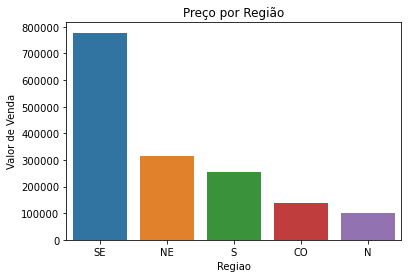

In [22]:
sns.barplot(x=numeros.Regiao, y=numeros['Valor de Venda'])
plt.title('Preço por Região')

In [23]:
valores_produto = dados.groupby('Produto').agg({'Valor de Venda':'sum'}).sort_values('Valor de Venda', ascending=False).reset_index()

Text(0.5, 1.0, 'Preço por Produto')

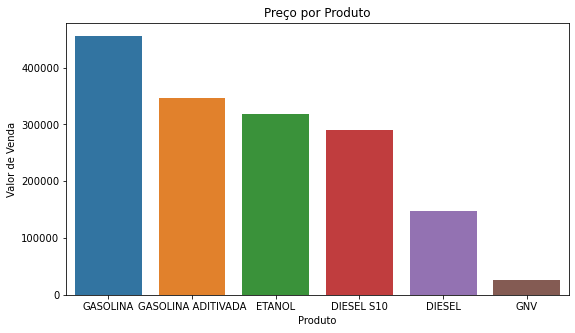

In [24]:
plt.figure(figsize=(9,5))
sns.barplot(x=valores_produto.Produto, y=valores_produto['Valor de Venda'])
plt.title('Preço por Produto')

In [25]:
valor_municipio = dados.groupby('Municipio').sum('Valor de Venda').sort_values(by='Valor de Venda', ascending=False).reset_index()[:27]

In [26]:
valor_municipio

,Municipio,Valor de Venda
0,SAO PAULO,76721.789
1,FORTALEZA,45017.367
2,RIO DE JANEIRO,33310.922
3,SALVADOR,31812.144
4,CUIABA,30306.642
5,BRASILIA,24144.718
6,GOIANIA,22338.627
7,CAMPINAS,20277.224
8,MANAUS,20144.985
9,CURITIBA,19722.010


<AxesSubplot:xlabel='Valor de Venda', ylabel='Municipio'>

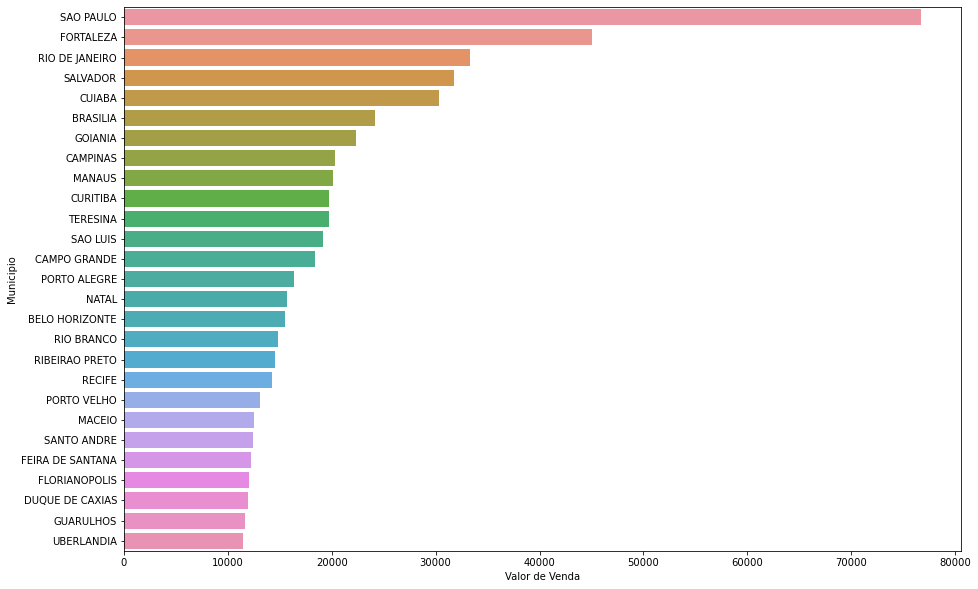

In [27]:
plt.figure(figsize=(15,10))
sns.barplot(x=valor_municipio['Valor de Venda'], y=valor_municipio.Municipio)

In [28]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334681 entries, 0 to 334680
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Regiao             334681 non-null  object 
 1   Estado             334681 non-null  object 
 2   Municipio          334681 non-null  object 
 3   Revenda            334681 non-null  object 
 4   Nome da Rua        334681 non-null  object 
 5   Numero Rua         334558 non-null  object 
 6   Bairro             334071 non-null  object 
 7   Cep                334681 non-null  object 
 8   Produto            334681 non-null  object 
 9   Data da Coleta     334681 non-null  object 
 10  Valor de Venda     334681 non-null  float64
 11  Unidade de Medida  334681 non-null  object 
 12  Bandeira           334681 non-null  object 
dtypes: float64(1), object(12)
memory usage: 33.2+ MB


In [29]:
dados['Data da Coleta'] = pd.to_datetime(dados['Data da Coleta'], format='%d/%m/%Y')

<AxesSubplot:xlabel='Data da Coleta', ylabel='Valor de Venda'>

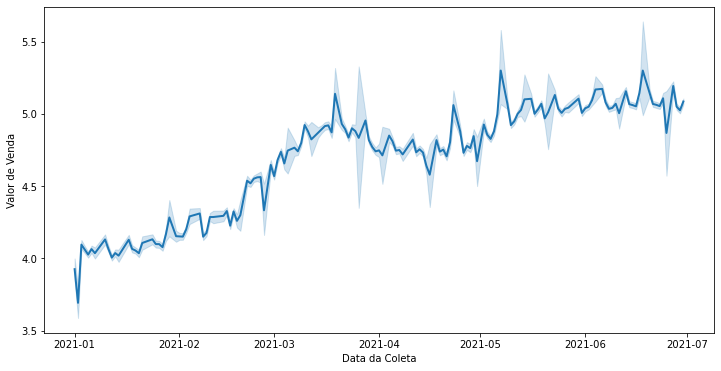

In [30]:
plt.figure(figsize=(12,6))
sns.lineplot(data=dados, x='Data da Coleta', y='Valor de Venda', lw=2)

Text(0, 0.5, 'Valor de venda')

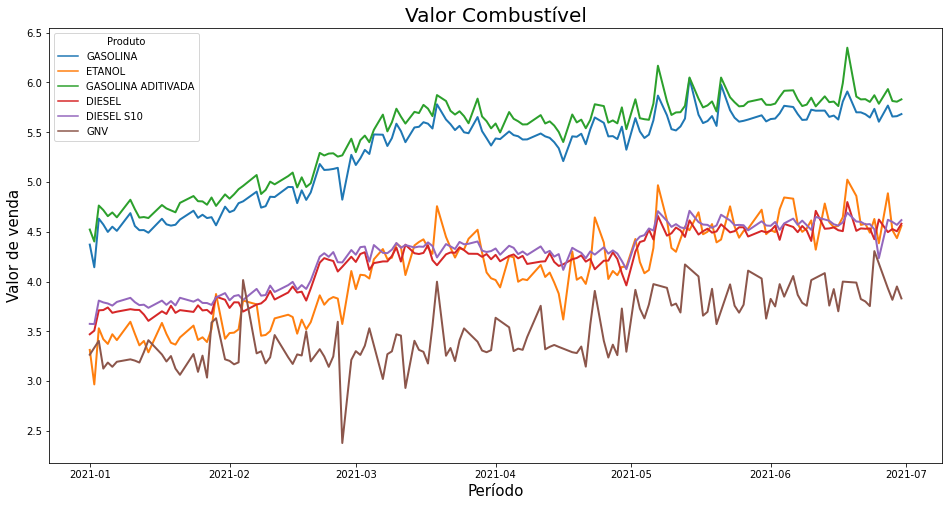

In [31]:
plt.figure(figsize=(16,8))
sns.lineplot(data=dados, x='Data da Coleta', y='Valor de Venda', hue='Produto', lw=2, ci=None)
plt.title('Valor Combustível', fontsize=20)
plt.xlabel('Período', fontsize=15)
plt.ylabel('Valor de venda', fontsize=15)

Text(0.5, 1.0, 'Preço Combustível por Região')

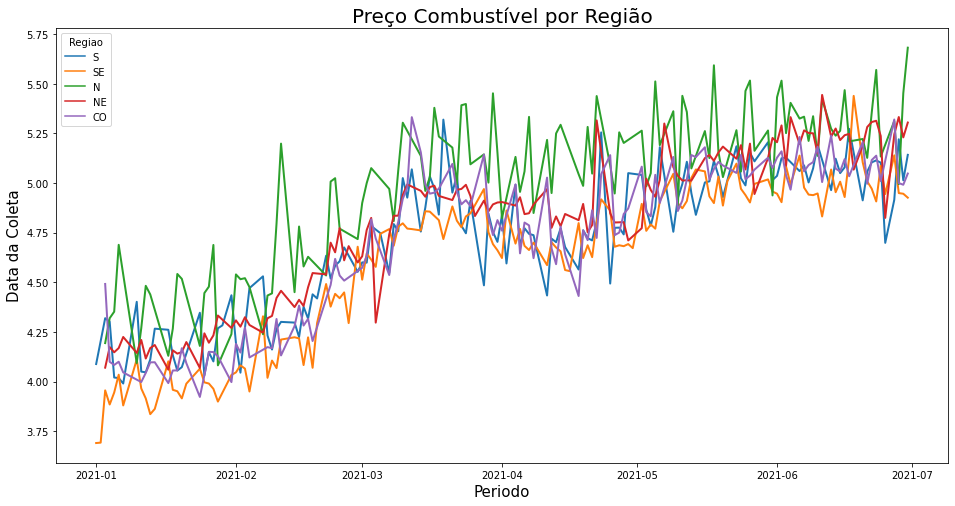

In [32]:
plt.figure(figsize=(16,8))
sns.lineplot(data=dados, x='Data da Coleta', y='Valor de Venda', hue='Regiao', ci=None, lw=2)
plt.xlabel('Periodo', fontsize=15)
plt.ylabel('Data da Coleta', fontsize=15)
plt.title('Preço Combustível por Região', fontsize=20)

In [33]:
dados.groupby('Bandeira').agg({'Valor de Venda':'mean'})

,Valor de Venda
Bandeira,
ALESAT,4.757473
AMERICANOIL,4.603092
ATEM' S,4.721196
ATLÂNTICA,4.813036
BRANCA,4.622813
CHARRUA,5.236183
CIAPETRO,4.698385
DIBRAPE,4.882333
DISLUB,4.854597
